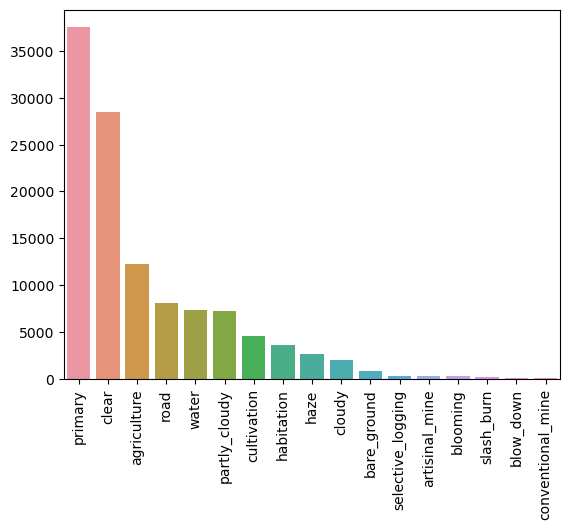

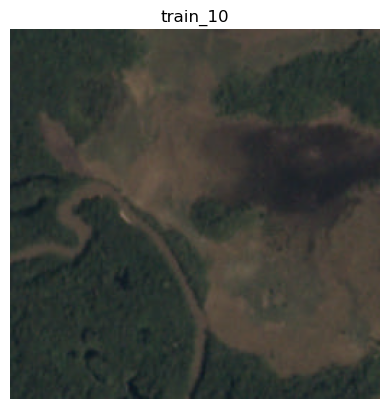

100%|██████████| 1000/1000 [00:01<00:00, 762.31it/s]


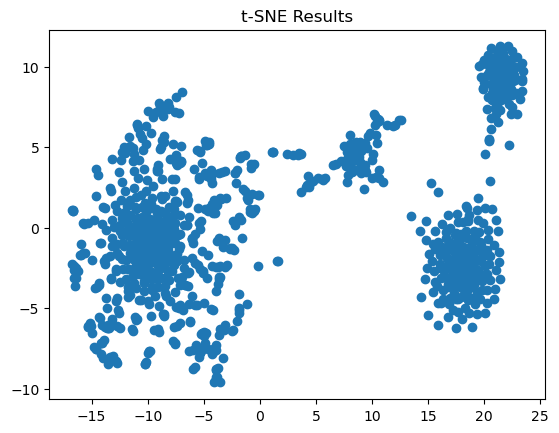

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


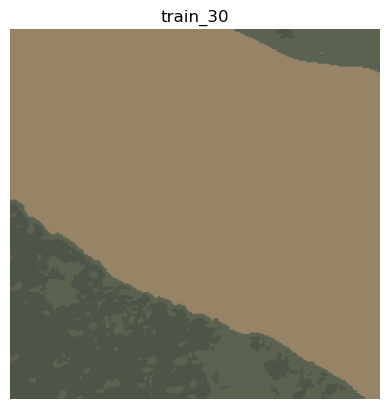

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import os

# Load the dataset
df = pd.read_csv('planet/planet/train_v2.csv/train_v2.csv')

# Preprocess tags
df['tags'] = df['tags'].apply(lambda x: x.split(' '))
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

# Visualize tag distribution
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=90)
plt.show()

# Function to load and display images
def get_image(name, folder='planet/planet/train-jpg', ext='jpg'):
    img_path = f'{folder}/{name}.{ext}'
    if not os.path.exists(img_path):
        print(f"Image {img_path} does not exist.")
        return None
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image {img_path}.")
    return img

def show_image(img, title=''):
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"Cannot display image {title} as it is None.")

# Example image display
example_image_name = 'train_10'
example_image = get_image(example_image_name)
show_image(example_image, title=example_image_name)

# Function to normalize and reshape images
def normalize_images(image_names):
    images = []
    for name in tqdm(image_names):
        img = get_image(name)
        if img is not None:
            img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX).reshape(-1)
            images.append(img)
    if images:
        return np.vstack(images)
    else:
        print("No images were loaded for normalization.")
        return np.array([])

# Dimensionality reduction with t-SNE
sample_images = df.sample(1000, random_state=42)['image_name']
img_matrix = normalize_images(sample_images)
if img_matrix.size > 0:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(img_matrix)

    # Plotting t-SNE results
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.title('t-SNE Results')
    plt.show()
else:
    print("No valid images to perform t-SNE.")

# Image segmentation and clustering
def segment_image(image_name):
    img = get_image(image_name)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = img_rgb.reshape(-1, 3)
        kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
        segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)
        return segmented_img, kmeans.labels_
    else:
        return None, None

def analyze_image(image_name):
    segmented_img, labels = segment_image(image_name)
    if segmented_img is not None:
        plt.imshow(segmented_img.astype('uint8'))
        plt.title(image_name)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to analyze image {image_name}.")

# Example of image analysis
analyze_image('train_30')


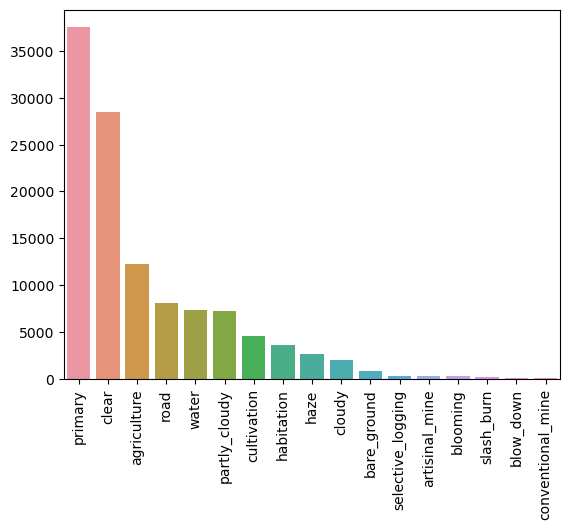

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('planet/planet/train_v2.csv/train_v2.csv')

# Preprocess tags
df['tags'] = df['tags'].apply(lambda x: x.split(' '))
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

# Visualize tag distribution
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=90)
plt.show()

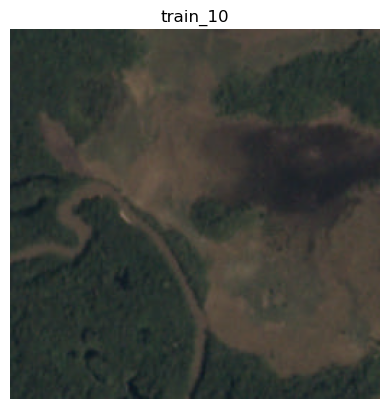

In [7]:
import cv2
import os

# Function to load and display images
def get_image(name, folder='planet/planet/train-jpg', ext='jpg'):
    img_path = f'{folder}/{name}.{ext}'
    if not os.path.exists(img_path):
        print(f"Image {img_path} does not exist.")
        return None
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image {img_path}.")
    return img

def show_image(img, title=''):
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"Cannot display image {title} as it is None.")

# Example image display
example_image_name = 'train_10'
example_image = get_image(example_image_name)
show_image(example_image, title=example_image_name)

100%|██████████| 1000/1000 [00:01<00:00, 726.84it/s]


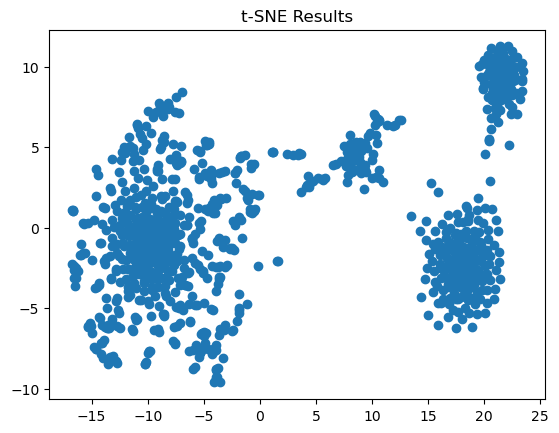

In [8]:
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE

# Function to normalize and reshape images
def normalize_images(image_names):
    images = []
    for name in tqdm(image_names):
        img = get_image(name)
        if img is not None:
            img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX).reshape(-1)
            images.append(img)
    if images:
        return np.vstack(images)
    else:
        print("No images were loaded for normalization.")
        return np.array([])

# Dimensionality reduction with t-SNE
sample_images = df.sample(1000, random_state=42)['image_name']
img_matrix = normalize_images(sample_images)
if img_matrix.size > 0:
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(img_matrix)

    # Plotting t-SNE results
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.title('t-SNE Results')
    plt.show()
else:
    print("No valid images to perform t-SNE.")

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 60.36%
Cluster 1: 10.04%
Cluster 2: 29.60%


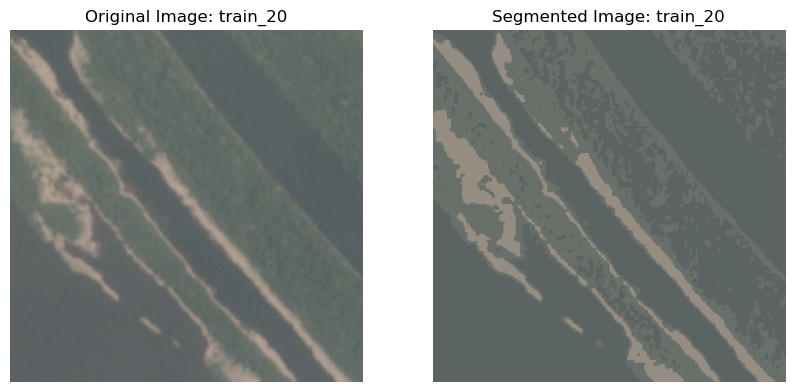

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Function to segment the image into different clusters
def segment_image(image_name, n_clusters=3):
    img = get_image(image_name)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = img_rgb.reshape(-1, 3)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
        segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)
        labels = kmeans.labels_
        return segmented_img, labels, img.shape
    else:
        return None, None, None

# Function to calculate the percentage of each cluster in the image
def calculate_cluster_percentages(labels, img_shape, n_clusters=3):
    total_pixels = img_shape[0] * img_shape[1]
    cluster_percentages = [(labels == i).sum() / total_pixels * 100 for i in range(n_clusters)]
    return cluster_percentages

# Function to display segmented image and percentages
def analyze_image(image_name, n_clusters=3):
    segmented_img, labels, img_shape = segment_image(image_name, n_clusters)
    if segmented_img is not None:
        plt.figure(figsize=(10, 5))

        # Display original image
        plt.subplot(1, 2, 1)
        original_img = get_image(image_name)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image: {image_name}')
        plt.axis('off')

        # Display segmented image
        plt.subplot(1, 2, 2)
        plt.imshow(segmented_img.astype('uint8'))
        plt.title(f'Segmented Image: {image_name}')
        plt.axis('off')

        print("Porcentagem de clusters:")

        # Calculate and display cluster percentages
        cluster_percentages = calculate_cluster_percentages(labels, img_shape, n_clusters)
        for i, percentage in enumerate(cluster_percentages):
            print(f"Cluster {i}: {percentage:.2f}%")

        plt.show()
    else:
        print(f"Failed to analyze image {image_name}.")

# Example of image analysis with detailed segmentation
analyze_image('train_20', n_clusters=3)


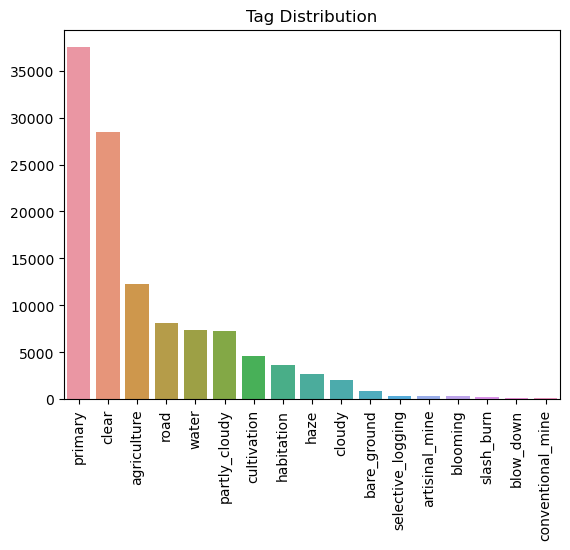

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Porcentagem de clusters:
Cluster 0: 11.11%
Cluster 1: 72.31%
Cluster 2: 16.58%


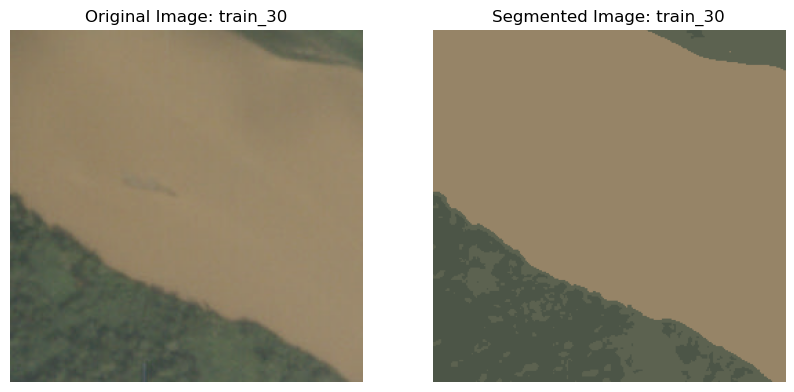

In [18]:
# Additional analysis and reporting
# (Include your custom analysis and visualization code here)
# Example: Generate reports with plots of tag distributions and clustered images.

# Function to generate a report
def generate_report():
    # Visualize tag distribution
    sns.barplot(x=tag_counts.index, y=tag_counts.values)
    plt.xticks(rotation=90)
    plt.title('Tag Distribution')
    plt.show()

    # Example of cluster visualization for a specific image
    analyze_image('train_30')

# Generate the report
generate_report()
